In [335]:
# pip install lets_plot

  Using cached lets_plot-4.8.0-cp310-cp310-win_amd64.whl.metadata (12 kB)
  Using cached pypng-0.20220715.0-py3-none-any.whl.metadata (13 kB)
  Using cached palettable-3.3.3-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/5.9 MB ? eta -:--:--
   ----------------------------------- ---- 5.2/5.9 MB 35.6 MB/s eta 0:00:01
   ----------------------------------- ---- 5.2/5.9 MB 35.6 MB/s eta 0:00:01
   ----------------------------------- ---- 5.2/5.9 MB 35.6 MB/s eta 0:00:01
   ----------------------------------- ---- 5.2/5.9 MB 35.6 MB/s eta 0:00:01
   ----------------------------------- ---- 5.2/5.9 MB 35.6 MB/s eta 0:00:01
   ----------------------------------- ---- 5.2/5.9 MB 35.6 MB/s eta 0:00:01
   ----------------------------------- ---- 5.2/5.9 MB 35.6 MB/s eta 0:00:01
   ----------------------------------- ---- 5.2/5.9 MB 35.6 MB/s eta 0:00:01
   ----------------------------------- ---- 5.2/5.9 MB 35.6 MB/s eta 0:00:01
   ----------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from itertools import cycle

from pandas_datareader import data as pdr

In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

In [235]:
from sklearn.linear_model import LinearRegression # Least Squares

from sklearn.svm import SVR # Support Vector Machine

from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbors

# Regularization (Penalized Regressors) --> Linear

from sklearn.linear_model import ElasticNet # Elastic Net Penalty
from sklearn.linear_model import Lasso # LASSO

# Decision Tree with Ensemble --> Non-linear

from sklearn.tree import DecisionTreeRegressor # Decision Tree

## Bagging (Bootstrapped-AGGregation) --> intelligent architecture like Homo Sapiens

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting (more recent approaches) --> Homo Sapiens Sapiens

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
from lets_plot import *
LetsPlot.setup_html()

### Download data (all constituents and S&P500)

- affinity propagation
- t-stochastic neighborhood embedding (t-sne)
- principal component analysis (PCA)

In [21]:
list_of_tickers = pd.read_html("https://stockanalysis.com/list/sp-500-stocks/")[0].iloc[ : , 1:]

list_of_tickers



,Symbol,Company Name,Market Cap,Stock Price,% Change,Revenue
0,NFLX,"Netflix, Inc.",4.71T,1112.17,-,43.38B
1,NVDA,NVIDIA Corporation,4.62T,190.17,1.77%,165.22B
2,AAPL,Apple Inc.,4.03T,272.41,-0.20%,416.16B
3,MSFT,Microsoft Corporation,3.79T,510.18,1.37%,293.81B
4,GOOG,Alphabet Inc.,3.34T,276.98,-0.77%,385.48B
...,...,...,...,...,...,...
497,LKQ,LKQ Corporation,7.82B,30.55,-2.55%,14.10B
498,MTCH,"Match Group, Inc.",7.62B,32.28,-0.80%,3.47B
499,MOH,"Molina Healthcare, Inc.",7.07B,137.54,-0.68%,42.84B
500,SOLS,"Solstice Advanced Materials, Inc.",6.91B,43.56,-4.75%,3.81B


In [22]:
tickers = list_of_tickers["Symbol"].tolist()
tickers

['NFLX',
 'NVDA',
 'AAPL',
 'MSFT',
 'GOOG',
 'GOOGL',
 'AMZN',
 'AVGO',
 'META',
 'TSLA',
 'BRK.B',
 'LLY',
 'JPM',
 'WMT',
 'ORCL',
 'V',
 'XOM',
 'MA',
 'JNJ',
 'PLTR',
 'ABBV',
 'COST',
 'AMD',
 'BAC',
 'HD',
 'PG',
 'GE',
 'CVX',
 'CSCO',
 'KO',
 'UNH',
 'IBM',
 'MU',
 'WFC',
 'MS',
 'CAT',
 'GS',
 'AXP',
 'PM',
 'TMUS',
 'RTX',
 'CRM',
 'MRK',
 'ABT',
 'MCD',
 'TMO',
 'PEP',
 'LIN',
 'ISRG',
 'UBER',
 'DIS',
 'APP',
 'QCOM',
 'LRCX',
 'INTU',
 'T',
 'AMGN',
 'AMAT',
 'C',
 'NOW',
 'NEE',
 'BX',
 'VZ',
 'BLK',
 'INTC',
 'SCHW',
 'ANET',
 'APH',
 'BKNG',
 'TJX',
 'GEV',
 'DHR',
 'GILD',
 'BSX',
 'ACN',
 'SPGI',
 'KLAC',
 'BA',
 'TXN',
 'PFE',
 'PANW',
 'ADBE',
 'SYK',
 'ETN',
 'CRWD',
 'COF',
 'WELL',
 'UNP',
 'PGR',
 'DE',
 'LOW',
 'HON',
 'MDT',
 'PLD',
 'CB',
 'ADI',
 'COP',
 'VRTX',
 'HOOD',
 'HCA',
 'LMT',
 'KKR',
 'CEG',
 'PH',
 'MCK',
 'CME',
 'ADP',
 'CMCSA',
 'SO',
 'CVS',
 'MO',
 'SBUX',
 'NEM',
 'DUK',
 'BMY',
 'NKE',
 'GD',
 'TT',
 'DELL',
 'MMC',
 'DASH',
 'MMM',
 'ICE

In [23]:
benchmark = tickers + ["SPY"]

In [24]:
start_date = "2006-11-01"
end_date = "2025-12-11"

In [25]:
prices =\
(
    yf.download(benchmark,
               start = start_date,
               end = end_date,
               auto_adjust = True,
               interval = "1d"
            )
    # .dropna()
    ["Close"]
)

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-11-01 -> 2025-12-11)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-11-01 -> 2025-12-11)')


In [26]:
prices

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2006-11-01,21.664768,2.374090,NaN,NaN,14.763542,6.749267,23.590090,37.759998,20.067253,22.763687,...,12.167171,39.070171,11.086798,36.543427,NaN,NaN,14.850145,62.042057,36.830002,NaN
2006-11-02,21.232620,2.368692,NaN,NaN,14.775998,6.878166,23.840437,37.660000,20.016569,22.172997,...,12.207624,39.075527,11.001478,36.610291,NaN,NaN,14.820183,62.456837,35.930000,NaN
2006-11-03,20.927563,2.347998,NaN,NaN,14.832032,7.015518,23.668768,37.750000,19.782114,21.283827,...,12.130567,39.473293,11.011510,37.103970,NaN,NaN,14.483193,62.923450,35.730000,NaN
2006-11-06,21.626640,2.390587,NaN,NaN,14.779107,7.073628,24.105085,38.540001,20.168634,21.277611,...,12.213404,40.446144,11.021554,37.494820,NaN,NaN,14.742799,64.617104,35.799999,NaN
2006-11-07,21.372433,2.414579,NaN,NaN,14.900530,7.115891,23.675920,39.610001,20.548813,20.848583,...,12.145978,40.236534,10.991441,37.299416,NaN,NaN,14.825178,64.556610,35.990002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10,146.360001,269.429993,218.710007,120.199997,125.889999,89.790001,244.550003,328.850006,232.000000,56.000000,...,22.680000,128.880005,80.400002,117.194946,151.050003,66.800003,148.259995,88.730003,260.630005,119.790001
2025-11-11,149.419998,275.250000,225.169998,122.529999,127.000000,90.660004,242.559998,333.220001,233.410004,57.630001,...,22.740000,126.070000,81.160004,118.741417,149.779999,65.910004,150.750000,88.500000,255.169998,120.120003
2025-11-12,151.520004,273.470001,233.229996,121.690002,128.820007,91.779999,246.529999,337.049988,241.440002,57.750000,...,22.450001,125.019997,80.720001,117.095818,149.869995,65.769997,149.369995,90.029999,255.690002,121.250000


In [27]:
prices.describe()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
count,4790.000000,4790.000000,3239.000000,1239.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,...,4790.000000,4790.000000,4790.000000,4790.000000,3544.000000,2512.000000,4790.000000,4790.000000,4790.000000,3218.000000
mean,62.851729,64.015086,85.589632,138.034379,54.646123,30.577091,135.859120,202.434096,81.263316,36.567135,...,20.388866,91.944124,34.345247,58.857746,68.235497,80.896134,65.285753,90.630921,153.355384,105.646934
std,45.116393,72.051217,52.515316,24.273561,38.012775,25.785170,108.052433,191.328472,65.505726,17.597713,...,7.536239,35.395229,20.188995,22.378091,37.123251,63.262459,41.162190,31.119645,143.323085,59.231924
min,7.905828,2.345299,20.059420,82.489998,13.804337,4.765058,19.584423,15.980000,10.674155,9.766371,...,4.108170,9.266607,8.902112,24.145130,19.160774,8.370000,11.518285,27.763395,16.450001,25.896317
25%,24.510852,11.207805,42.149166,121.125000,18.975562,10.629461,42.710073,38.592500,26.994801,21.881387,...,13.943164,68.901154,15.167940,45.060522,32.170459,47.677500,29.465185,61.158544,37.970001,44.489478
50%,39.552938,26.586849,68.096085,135.309998,37.092234,22.867524,97.469818,95.365002,51.003620,33.078371,...,20.843296,89.271885,30.228021,53.131794,65.584579,66.389999,52.399229,97.820541,83.555000,105.040615
75%,108.904667,122.957169,129.388115,152.209999,96.166832,38.078732,239.052502,361.612495,135.417084,45.164942,...,26.319972,110.926140,54.833964,59.694656,99.213324,82.314999,101.408390,113.232271,257.157494,161.455132
max,174.067612,275.250000,242.630859,216.839996,138.334625,109.220207,394.312805,688.369995,254.623001,89.422707,...,37.470200,207.529663,81.849998,119.946037,152.949997,281.809998,160.955292,167.155380,614.549988,237.474976


In [28]:
spy_price =\
(
    prices['SPY']
)
spy_price

Date
2006-11-01     95.973579
2006-11-02     95.917534
2006-11-03     95.749184
2006-11-06     96.829170
2006-11-07     97.200783
                 ...    
2025-11-10    681.440002
2025-11-11    683.000000
2025-11-12    683.380005
2025-11-13    672.039978
2025-11-14    671.929993
Name: SPY, Length: 4790, dtype: float64

In [29]:
forex_ticker = ["DEXJPUS", "DEXUSUK"]
forex_data =\
(
    pdr
    .get_data_fred(forex_ticker,
                   start = start_date,
                   end = end_date)
)
forex_data

,DEXJPUS,DEXUSUK
DATE,,
2006-11-01,117.01,1.9091
2006-11-02,117.12,1.9088
2006-11-03,118.06,1.9011
2006-11-06,118.40,1.8967
2006-11-07,117.44,1.9098
...,...,...
2025-11-03,154.13,1.3150
2025-11-04,153.55,1.3044
2025-11-05,154.11,1.3051


In [30]:
index_ticker = ["VIXCLS"]
index_data =\
(
    pdr
    .get_data_fred(index_ticker,
                   start = start_date,
                   end = end_date)
)
index_data

,VIXCLS
DATE,
2006-11-01,11.51
2006-11-02,11.42
2006-11-03,11.16
2006-11-06,11.16
2006-11-07,11.09
...,...
2025-11-07,19.08
2025-11-10,17.60
2025-11-11,17.28


## Y variable - S&P weekly

In [31]:
#data wrangle
return_period = 5

In [32]:
spy_price

Date
2006-11-01     95.973579
2006-11-02     95.917534
2006-11-03     95.749184
2006-11-06     96.829170
2006-11-07     97.200783
                 ...    
2025-11-10    681.440002
2025-11-11    683.000000
2025-11-12    683.380005
2025-11-13    672.039978
2025-11-14    671.929993
Name: SPY, Length: 4790, dtype: float64

In [33]:
spy_weekly =\
(
    np.log(spy_price)
    .diff(return_period)
    .shift(-return_period)
)
spy_weekly

Date
2006-11-01    0.014868
2006-11-02    0.010183
2006-11-03    0.012374
2006-11-06    0.003614
2006-11-07    0.007260
                ...   
2025-11-10         NaN
2025-11-11         NaN
2025-11-12         NaN
2025-11-13         NaN
2025-11-14         NaN
Name: SPY, Length: 4790, dtype: float64

In [34]:
spy_weekly.name

'SPY'

In [35]:
spy_weekly.name =\
(
    spy_weekly
    .name
    + 
    "_pred"
)

In [36]:
spy_weekly

Date
2006-11-01    0.014868
2006-11-02    0.010183
2006-11-03    0.012374
2006-11-06    0.003614
2006-11-07    0.007260
                ...   
2025-11-10         NaN
2025-11-11         NaN
2025-11-12         NaN
2025-11-13         NaN
2025-11-14         NaN
Name: SPY_pred, Length: 4790, dtype: float64

## X variables setup

In [37]:
def compute_x_var(ticker_name):
    ###Currency exchange rates###
    x1_forex =\
    (
        np
        .log(forex_data)
        .diff(return_period)
    )
     
    ####Index data###
    x2_index =\
    (
        np
        .log(index_data)
        .diff(return_period)
    )
    
    ###lagged 5,15,30,60 returns of s&p index###
    x3_lagged =\
    pd.concat(
        [np
        .log(spy_price
            )
        .diff(i) for i in [return_period,
                           return_period * 3, # 15
                           return_period * 6, # 30
                           return_period * 12 # 60
                          ]
        ],
        axis = 1
    ).dropna()
        
    cols = [f"{ticker_name}_{t}" for t in ["DT", "3DT", "6DT", "12DT"]]
    x3_lagged.columns = cols
    
    ###21, 63, 252 MA of stock###
    x4_ma =\
    pd.concat(
        [(spy_price
        )
        .rolling(window = i) 
         .mean() for i in [21,
                           63,
                           252
                            ]
        ],
        axis =1
    ).dropna()
    
    macols = [f"{ticker_name}_MA_{t}" for t in ["21", "63", "252"]]
    x4_ma.columns = macols

    ### 10, 30, 200 EMA of stock ###
    x5_ema =\
    pd.concat(
        [(spy_price
        )
        .ewm(span = i, adjust= False) 
         .mean() for i in [10,
                           30,
                           200
                                      ]
        ],
        axis =1
    ).dropna()
        
    emacols = [f"{ticker_name}_EMA_{t}" for t in ["10", "30", "200"]]
    x5_ema.columns = emacols

    X =\
    (
        pd
        .concat([x1_forex, 
                 x2_index, 
                 x3_lagged, 
                 x4_ma, 
                 x5_ema
                ],
                axis = 1)
    )
    return X

In [38]:
X =\
(
    compute_x_var("SPY")
)
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.973579,95.973579,95.973579
2006-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.963389,95.969964,95.973022
2006-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.924443,95.955720,95.970794
2006-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.088939,96.012071,95.979336
2006-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.291092,96.088762,95.991489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10,NaN,NaN,0.024735,-0.002784,0.014992,0.026408,0.060148,674.063331,660.491048,605.227220,676.876929,671.631986,620.285910
2025-11-11,NaN,NaN,-0.094889,0.011427,0.017294,0.024935,0.062652,675.013808,661.124270,605.602396,677.990214,672.365406,620.909931
2025-11-12,NaN,NaN,-0.028155,0.008523,0.023062,0.022089,0.068648,676.020952,661.762573,605.968964,678.970176,673.076025,621.531524
2025-11-13,NaN,NaN,0.025318,0.002578,0.000417,0.004205,0.054576,676.348095,662.244778,606.288297,677.710140,673.009184,622.034096


In [39]:
data =\
(
    pd
    .concat([spy_weekly, X],
            axis = 1)
    .dropna()
)
data

,SPY_pred,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2007-11-01,-0.025958,0.006813,0.016125,0.091998,-0.005349,-0.028974,-0.003510,0.012710,109.807364,106.911717,103.875344,109.197502,108.933154,105.208135
2007-11-02,-0.040905,0.006383,0.014806,0.162442,-0.015879,-0.033366,-0.005080,0.043916,109.711433,106.976128,103.923126,108.982426,108.873892,105.236060
2007-11-05,-0.043240,-0.001309,0.009177,0.201677,-0.026828,-0.032522,-0.010871,0.040969,109.514122,107.009892,103.967870,108.657078,108.765448,105.255532
2007-11-06,-0.026588,-0.001832,0.009054,0.015073,-0.006489,-0.011182,0.004481,0.050755,109.413769,107.043314,104.019008,108.653265,108.757103,105.289169
2007-11-07,-0.001624,-0.017326,0.012816,0.357376,-0.044561,-0.041971,-0.028526,0.038422,109.122233,107.079674,104.054068,108.109815,108.557567,105.292902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-03,-0.002784,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112658,679.363537,670.221390,617.474492
2025-11-04,0.011427,0.009225,-0.017931,0.145939,-0.017353,0.019455,0.017976,0.062764,672.449521,657.962401,603.562778,678.613801,670.545171,618.049273
2025-11-05,0.008523,0.014378,-0.014604,0.062431,-0.014374,0.018485,0.024623,0.055634,672.852379,658.709672,604.012774,678.425841,670.999032,618.641619
2025-11-06,0.002578,-0.007814,-0.003047,0.142509,-0.014103,0.014531,0.018459,0.041429,672.719046,659.263508,604.438744,676.950233,670.954578,619.155732


## data split train/test

In [40]:
Y =\
(
    data
    .loc[ : , spy_weekly.name]
)

Y

2007-11-01   -0.025958
2007-11-02   -0.040905
2007-11-05   -0.043240
2007-11-06   -0.026588
2007-11-07   -0.001624
                ...   
2025-11-03   -0.002784
2025-11-04    0.011427
2025-11-05    0.008523
2025-11-06    0.002578
2025-11-07    0.001430
Name: SPY_pred, Length: 4294, dtype: float64

In [41]:
Y

2007-11-01   -0.025958
2007-11-02   -0.040905
2007-11-05   -0.043240
2007-11-06   -0.026588
2007-11-07   -0.001624
                ...   
2025-11-03   -0.002784
2025-11-04    0.011427
2025-11-05    0.008523
2025-11-06    0.002578
2025-11-07    0.001430
Name: SPY_pred, Length: 4294, dtype: float64

In [42]:
X =\
(
    data
    .loc[ : , X.columns]
)

In [156]:
testing_set = 0.25

train_size = int(len(X) * (1 - testing_set)
                )
train_size_bh = int(len(bh_returns) * (1 - testing_set))

In [155]:
train_size

3220

In [45]:
len(Y) == len(X) # cross-validate the data

True

In [46]:
Y_train, Y_test =\
(
    Y[0         : train_size],
    Y[train_size:len(Y)     ]
)

In [47]:
X_train, X_test =\
(
    X[0         : train_size],
    X[train_size:len(X)     ]
)

In [159]:
#set up variables for buyandhold
spy_weekly_price = spy_price.resample('W-FRI').last() 
bh_returns = np.log(spy_weekly_price).diff()   # no shift!
bh_train = bh_returns.iloc[:train_size_bh].dropna()
bh_test  = bh_returns.iloc[train_size_bh:].dropna()

In [48]:
#set metrics
seed = 2025
num_folds = 10

metric = "neg_mean_squared_error" 

## set up models

In [49]:
models = []

In [50]:
(
    models
    .append(
        ("LR", LinearRegression()
         )
           )
)
(
    models
    .append(
        ("Elastic Net Penalty", ElasticNet()
         )
           )
)
(
    models
    .append(
        ("LASSO", Lasso()
         )
           )
)
(
    models
    .append(
        ("Support Vector Machine", SVR()
         )
           )
)
(
    models
    .append(
        ("K-Nearest Neighbors", KNeighborsRegressor()
         )
           )
)
(
    models
    .append(
        ("Decision Tree", DecisionTreeRegressor()
         )
           )
)
(
    models
    .append(
        ("Extra Trees Algo", ExtraTreesRegressor()
         )
           )
)
(
    models
    .append(
        ("Random Forest", RandomForestRegressor()
         )
           )
)
(
    models
    .append(
        ("Gradient Boosting", GradientBoostingRegressor()
         )
           )
)

(
    models
    .append(
        ("Adaptive Boosting", AdaBoostRegressor()
         )
           )
)

In [51]:
models

[('LR', LinearRegression()),
 ('Elastic Net Penalty', ElasticNet()),
 ('LASSO', Lasso()),
 ('Support Vector Machine', SVR()),
 ('K-Nearest Neighbors', KNeighborsRegressor()),
 ('Decision Tree', DecisionTreeRegressor()),
 ('Extra Trees Algo', ExtraTreesRegressor()),
 ('Random Forest', RandomForestRegressor()),
 ('Gradient Boosting', GradientBoostingRegressor()),
 ('Adaptive Boosting', AdaBoostRegressor())]

In [52]:
# Let's build empty lists to store performance across many algorithms

names = []

train_results = []
test_results = []

kfold_results = []

In [53]:
for name, model in models:

    names.append(name)

    # set k-fold cross-validation (here, 10)

    kfold =\
    (
        KFold(n_splits = num_folds,
              random_state = seed,
              shuffle = True)
    )

    # run cross-validation

    cv_results =\
    (
        -1
        *
        cross_val_score(model, X_train, Y_train,
                        cv = kfold,
                        scoring = metric)
    )

    # Cross-validation results should be contained in objects

    kfold_results.append(cv_results)

    # Training Set Model Fitting

    res = model.fit(X_train, Y_train)

    # Assess the performance in Training Set

    train_result = mean_squared_error(res.predict(X_train), Y_train)

    train_results.append(train_result)

    # Assess the performance in Testing Set

    test_result = mean_squared_error(res.predict(X_test), Y_test)

    test_results.append(test_result)    

    user_interface_message = "%s: %f (%f) %f %f " % (name, 
                                                     cv_results.mean(), 
                                                     cv_results.std(), 
                                                     train_result, 
                                                     test_result)

    print(user_interface_message)

LR: 0.000694 (0.000142) 0.000681 0.000562 
Elastic Net Penalty: 0.000696 (0.000134) 0.000696 0.000531 
LASSO: 0.000696 (0.000134) 0.000696 0.000531 
Support Vector Machine: 0.001933 (0.000181) 0.001880 0.004906 
K-Nearest Neighbors: 0.000310 (0.000067) 0.000163 0.000758 
Support Vector Machine: 0.001933 (0.000181) 0.001880 0.004906 
K-Nearest Neighbors: 0.000310 (0.000067) 0.000163 0.000758 
Decision Tree: 0.000750 (0.000199) 0.000000 0.002765 
Decision Tree: 0.000750 (0.000199) 0.000000 0.002765 
Extra Trees Algo: 0.000289 (0.000071) 0.000000 0.000767 
Extra Trees Algo: 0.000289 (0.000071) 0.000000 0.000767 
Random Forest: 0.000415 (0.000092) 0.000052 0.000717 
Random Forest: 0.000415 (0.000092) 0.000052 0.000717 
Gradient Boosting: 0.000536 (0.000106) 0.000357 0.000595 
Gradient Boosting: 0.000536 (0.000106) 0.000357 0.000595 
Adaptive Boosting: 0.000977 (0.000116) 0.001048 0.000793 
Adaptive Boosting: 0.000977 (0.000116) 0.001048 0.000793 


In [54]:
df_for_comparison =\
(
    pd
    .DataFrame(
        {"Algorithms": names * 2,
         "Data": ["Training Set"] * len(names) + ["Testing Set"] * len(names),
         "Performance": train_results + test_results
         }
    )
)
df_for_comparison

,Algorithms,Data,Performance
0,LR,Training Set,6.814604e-04
1,Elastic Net Penalty,Training Set,6.957107e-04
2,LASSO,Training Set,6.957107e-04
3,Support Vector Machine,Training Set,1.880411e-03
4,K-Nearest Neighbors,Training Set,1.633787e-04
5,Decision Tree,Training Set,0.000000e+00
6,Extra Trees Algo,Training Set,6.496724e-34
7,Random Forest,Training Set,5.230545e-05
8,Gradient Boosting,Training Set,3.574739e-04
9,Adaptive Boosting,Training Set,1.048070e-03


In [55]:
performance_comparison =\
(
    ggplot(df_for_comparison,
           aes(x = "Algorithms",
               y = "Performance",
               fill = "Data"
              )
          )
    + geom_bar(stat = "identity",
               position = "dodge",
               width = 0.5)
    + labs(title = "Comparing the Performance of Machine Learning Algorithms on the Training vs. Testing Set",
           y = "Mean Squared Error (MSE)",
           x = "Name of ML Algorithms",
           caption = "Source: Federal Reserve Bank & Yahoo Finance")
    + theme(legend_position = "top")
    + ggsize(1000, 500)
)

performance_comparison.show()
##red > blue underfitting
## blue > red overfitting
## blue line is what we care about

## Elastic Net Model

In [56]:
elastic_net_model = None

for name, model in models:
    if name == "Elastic Net Penalty":
        elastic_net_model = model
        break


In [57]:
elastic_net_model.fit(X_train, Y_train)

y_pred_train_enm = elastic_net_model.predict(X_train)
y_pred_test_enm = elastic_net_model.predict(X_test)


## Linear Regression

In [58]:
linear_regression = None

for name, model in models:
    if name == "LR":
        linear_regression = model
        break
linear_regression.fit(X_train, Y_train)

y_pred_train_lr = linear_regression.predict(X_train)
y_pred_test_lr = linear_regression.predict(X_test)


## Adaptive Boosting

In [173]:
adaptive_boosting = None

for name, model in models:
    if name == "Adaptive Boosting":
        adaptive_boosting = model
        break
adaptive_boosting.fit(X_train, Y_train)

y_pred_train_ab = adaptive_boosting.predict(X_train)
y_pred_test_ab = adaptive_boosting.predict(X_test)


In [379]:
y_pred_train

array([0.00244338, 0.00352794, 0.00197021, ..., 0.00838768, 0.01003657,
       0.01111706], shape=(1775,))

In [ ]:
# train_strategy_returns = pd.Series(train_positions * Y_train.values, index=Y_train.index)
# test_strategy_returns = pd.Series(test_positions * Y_test.values, index=Y_test.index)

In [ ]:
# metrics_train = calculate_metrics(train_strategy_returns, periods_per_year = 52)
# metrics_test  = calculate_metrics(test_strategy_returns, periods_per_year = 52)
# metrics_train,metrics_test

(       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
 0  0.598413  0.612689     -0.845466         3.317159e+06,
        CAGR    Sharpe  Max_Drawdown  Final_Account_Value
 0  1.467993  1.482529     -0.568444        942498.487222)

In [ ]:
# len(y_pred_test)

592

In [ ]:
# pred_train_series = pd.Series(y_pred_train, index=Y_train.index)
# pred_test_series = pd.Series(y_pred_test, index=Y_test.index)


In [177]:
def simple_momentum_strategy(predictions, actual_returns, lookback=10):
    """
    Simple momentum: Go long if recent predictions are improving
    """
    # pred_series = pd.Series(predictions, index=actual_returns.index)
    vol_window = 5
    vol_threshold = 0.02
    df = pd.DataFrame(index=actual_returns.index)
    df["pred"] = pd.Series(predictions, index=actual_returns.index)

    # Compute SMAs
    df['sma3'] = df['pred'].rolling(3).mean()
    df['sma7'] = df['pred'].rolling(7).mean()

    
    # Momentum signal: current prediction vs rolling average
    # pred_momentum = pred_series > pred_series.rolling(lookback).mean()

    # Generate signals using crossovers
    threshold = 0.001
    # df['signal'] = np.where(df['sma3'] > df['sma7'], 1, -1)
    df['signal'] = np.where(df['sma3'] - df['sma7'] > threshold, 1,
                            np.where(df['sma7'] - df['sma3'] > threshold, -1 , 0)) 
     # Compute rolling volatility of actual returns
    # df['vol'] = actual_returns.rolling(vol_window).std()

    # # Apply volatility filter: zero out positions if vol too high
    # df.loc[df['vol'] > vol_threshold, 'signal'] = 0

    df['strategy_returns'] = df['signal'].shift(1) * actual_returns
    # Go long if momentum positive, short if negative
    # positions = np.where(pred_momentum, 1, -1)
    
    # strategy_returns = pd.Series(positions * actual_returns.values, 
    #                             index=actual_returns.index)
    
    return df['strategy_returns'].dropna()



In [129]:
def calculate_metrics(ts_returns, periods_per_year = 252, starting_capital = 100_000, is_log_return = False):
    if is_log_return:
        equity = np.exp(ts_returns.cumsum())
    else:
        equity = (ts_returns + 1).cumprod()
    # equity = ts_returns.add(1).cumprod()
    equity_dollars = equity * starting_capital
    years =\
    (
        equity.index[-1]
        -
        equity.index[0]
    ).days / 365.25

    n_years = ts_returns.shape[0] / periods_per_year
    # Annualized return
    if is_log_return:
        # For log returns, cumulative growth = exp(sum(log_returns))
        total_return_factor = equity.iloc[-1]
        annualized_return = total_return_factor ** (1 / n_years) - 1
    else:
        total_return_factor = equity.iloc[-1]
        annualized_return = total_return_factor ** (1 / n_years) - 1
    # annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
    #                             ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    if isinstance(annualized_vol, (int, float, np.floating)):
    # scalar case
        annualized_vol_safe = np.nan if annualized_vol == 0 else annualized_vol
    else:
        # pandas Series case
        annualized_vol_safe = annualized_vol.replace(0, np.nan)

    annualized_sharpe = annualized_return / annualized_vol_safe

    cagr = equity.iloc[-1] ** (1 / years) - 1

    max_dd =\
    (
        (equity - equity.cummax()
        )
        /
        equity.cummax()
    ).min()
    
    # Extract final account value as a scalar, not a Series
    final_account_value = equity_dollars.iloc[-1].values if hasattr(equity_dollars.iloc[-1], 'values') else equity_dollars.iloc[-1]

    return pd.DataFrame({
        "CAGR": [cagr],
        "Sharpe": [annualized_sharpe],  # Keep as raw number, not percentage
        "Max_Drawdown": [max_dd],
        "Final_Account_Value": [final_account_value]  # Keep as dollar amount
    }
    )

In [152]:
print("Number of weekly periods:", bh_test.shape[0])

Number of weekly periods: 0


In [148]:
def compute_and_compare(train_momentum, test_momentum, bh_train, bh_test):

    # Calculate metrics for your momentum strategy
    strategy_metrics_train = calculate_metrics(train_momentum.dropna(), periods_per_year=52, is_log_return= False)
    strategy_metrics_test = calculate_metrics(test_momentum.dropna(), periods_per_year=52, is_log_return = False)

    print("Momentum Strategy Performance:")
    print("Training Set:")
    print(strategy_metrics_train)
    print("\nTesting Set:")
    print(strategy_metrics_test)

    # Calculate buy-and-hold metrics
    bh_train_result = calculate_metrics(bh_train, periods_per_year=52, is_log_return = True)
    bh_test_result = calculate_metrics(bh_test, periods_per_year=52, is_log_return= True)

    print("\nBuy-and-Hold Performance:")
    print("Training Set:")
    print(bh_train_result)
    print("\nTesting Set:")
    print(bh_test_result)

    # Detailed comparison
    print("\n" + "="*50)
    print("PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold")
    print("="*50)

    print(f"\nSHARPE RATIO:")
    print(f"Train - Momentum: {strategy_metrics_train['Sharpe'].iloc[0]:.3f} vs BH: {bh_train_result['Sharpe'].iloc[0]:.3f}")
    print(f"Test  - Momentum: {strategy_metrics_test['Sharpe'].iloc[0]:.3f} vs BH: {bh_test_result['Sharpe'].iloc[0]:.3f}")

    print(f"\nCAGR (Annualized Return):")
    print(f"Train - Momentum: {strategy_metrics_train['CAGR'].iloc[0]:.3f} vs BH: {bh_train_result['CAGR'].iloc[0]:.3f}")
    print(f"Test  - Momentum: {strategy_metrics_test['CAGR'].iloc[0]:.3f} vs BH: {bh_test_result['CAGR'].iloc[0]:.3f}")

    print(f"\nMAX DRAWDOWN:")
    print(f"Train - Momentum: {strategy_metrics_train['Max_Drawdown'].iloc[0]:.3f} vs BH: {bh_train_result['Max_Drawdown'].iloc[0]:.3f}")
    print(f"Test  - Momentum: {strategy_metrics_test['Max_Drawdown'].iloc[0]:.3f} vs BH: {bh_test_result['Max_Drawdown'].iloc[0]:.3f}")

    print(f"\nFINAL ACCOUNT VALUE ($):")
    print(f"Train - Momentum: ${strategy_metrics_train['Final_Account_Value'].iloc[0]:,.2f} vs BH: ${bh_train_result['Final_Account_Value'].iloc[0]:,.2f}")
    print(f"Test  - Momentum: ${strategy_metrics_test['Final_Account_Value'].iloc[0]:,.2f} vs BH: ${bh_test_result['Final_Account_Value'].iloc[0]:,.2f}")

    # Calculate outperformance
    sharpe_outperformance = strategy_metrics_test['Sharpe'].iloc[0] - bh_test_result['Sharpe'].iloc[0]
    cagr_outperformance = strategy_metrics_test['CAGR'].iloc[0] - bh_test_result['CAGR'].iloc[0]

    print(f"\nOUTPERFORMANCE (Test Set):")
    print(f"Sharpe Ratio: {sharpe_outperformance:+.3f}")
    print(f"CAGR: {cagr_outperformance:+.3f}")

## Elastic Net Model Results

In [149]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_enm, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_enm, Y_test)
# strategy_metrics_train = calculate_metrics(train_momentum['strategy_returns'].dropna(), periods_per_year=52)
# strategy_metrics_test = calculate_metrics(test_momentum['strategy_returns'].dropna(), periods_per_year=52)



In [161]:
elastic_net_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)

Momentum Strategy Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0 -0.422435 -0.593563     -0.999972             60.10628

Testing Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0 -0.492089 -0.825214      -0.96345          4766.032029

Buy-and-Hold Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.098106  0.511577     -0.546131         379102.40424

Testing Set:
       CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  0.138327  0.8482     -0.239272        185111.077314

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: -0.594 vs BH: 0.512
Test  - Momentum: -0.825 vs BH: 0.848

CAGR (Annualized Return):
Train - Momentum: -0.422 vs BH: 0.098
Test  - Momentum: -0.492 vs BH: 0.138

MAX DRAWDOWN:
Train - Momentum: -1.000 vs BH: -0.546
Test  - Momentum: -0.963 vs BH: -0.239

FINAL ACCOUNT VALUE ($):
Train - Momentum: $60.11 vs BH: $379,102.40
Test  - Momentum: $4,766.03

In [131]:
strategy_metrics_test['Sharpe'].iloc[0]

np.float64(-0.8208131457946716)

In [103]:
 float(strategy_metrics_train['Sharpe'].iloc[0])

-0.6037628105888918

## Linear Regression

In [178]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_lr, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_lr, Y_test)
linear_regression_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)


Momentum Strategy Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.043258  0.061938     -0.615295        177213.258474

Testing Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.448964  0.600858     -0.442207        529178.026552

Buy-and-Hold Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.098106  0.511577     -0.546131         379102.40424

Testing Set:
       CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  0.138327  0.8482     -0.239272        185111.077314

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.062 vs BH: 0.512
Test  - Momentum: 0.601 vs BH: 0.848

CAGR (Annualized Return):
Train - Momentum: 0.043 vs BH: 0.098
Test  - Momentum: 0.449 vs BH: 0.138

MAX DRAWDOWN:
Train - Momentum: -0.615 vs BH: -0.546
Test  - Momentum: -0.442 vs BH: -0.239

FINAL ACCOUNT VALUE ($):
Train - Momentum: $177,213.26 vs BH: $379,102.40
Test  - Momentum: $529,178

## Adaptive Boosting

In [174]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_ab, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_ab, Y_test)
adaptive_boosting_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)



Momentum Strategy Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.477935  0.551909     -0.562985         1.960035e+07

Testing Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0 -0.217384 -0.415357     -0.769419          33245.68197

Buy-and-Hold Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.098106  0.511577     -0.546131         379102.40424

Testing Set:
       CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  0.138327  0.8482     -0.239272        185111.077314

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.552 vs BH: 0.512
Test  - Momentum: -0.415 vs BH: 0.848

CAGR (Annualized Return):
Train - Momentum: 0.478 vs BH: 0.098
Test  - Momentum: -0.217 vs BH: 0.138

MAX DRAWDOWN:
Train - Momentum: -0.563 vs BH: -0.546
Test  - Momentum: -0.769 vs BH: -0.239

FINAL ACCOUNT VALUE ($):
Train - Momentum: $19,600,345.01 vs BH: $379,102.40
Test  - Momentum: $33

In [179]:
missing_fractions = \
    prices \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

In [180]:
missing_fractions.head(10)
#no missing as we choose a more recent timeframe

Ticker
BF.B     1.000000
BRK.B    1.000000
Q        0.996868
SOLS     0.995825
GEV      0.913987
SOLV     0.913779
VLTO     0.888935
KVUE     0.867015
GEHC     0.847182
CEG      0.799374
dtype: float64

## Set up PCA

In [181]:
drop_list =\
(
    sorted(list(missing_fractions[missing_fractions > 0.30]
                .index)
          )
)

df_pca =\
(
    prices
    .drop(labels = drop_list,
          axis = 1)
)
df_pca.shape[1]


444

In [182]:
df_pca['SPY']

Date
2006-11-01     95.973579
2006-11-02     95.917534
2006-11-03     95.749184
2006-11-06     96.829170
2006-11-07     97.200783
                 ...    
2025-11-10    681.440002
2025-11-11    683.000000
2025-11-12    683.380005
2025-11-13    672.039978
2025-11-14    671.929993
Name: SPY, Length: 4790, dtype: float64

In [183]:
df_pca =\
(
    df_pca
    .fillna(method = "ffill")
)

df_pca =\
(
    df_pca
    .dropna(axis = 0)
)

df_pca.shape

C:\Users\coool\AppData\Local\Temp\ipykernel_2488\4107408549.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pca


(3365, 444)

In [184]:
tickers_no_spy = [c for c in df_pca.columns if c != "SPY"]
print(len(tickers_no_spy))

443


In [254]:
Daily_Linear_Return =\
(
    df_pca
    .pct_change(1)
)

Daily_Linear_Return.shape[0]

3365

In [256]:
# Operational defition of outliers = data points beyond 3 SD

# Daily_Linear_Return =\
# (
#     Daily_Linear_Return[Daily_Linear_Return 
#                         .apply(lambda x:(x - x.mean()
#                                         ).abs() < (3 * x.std()
#                                                   )
#                               )
#                         .all(1)
#     ]
# )
Daily_Linear_Return_clipped = Daily_Linear_Return.clip(
    lower = Daily_Linear_Return.mean() - 3 * Daily_Linear_Return.std(),
    upper = Daily_Linear_Return.mean() + 3 * Daily_Linear_Return.std(),
    axis = 1 
)
Daily_Linear_Return.shape[0]

3365

In [257]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [258]:
scaled_dfprices =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_dfprices.describe()

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
count,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,...,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03
mean,9.504882e-18,-6.336588e-18,-6.864637e-18,4.752441e-18,1.689757e-17,4.224392e-18,2.244208e-18,-1.531342e-17,4.224392e-18,-2.006586e-17,...,1.425732e-17,8.712809e-18,-7.920735e-18,-1.689757e-17,7.920735e-18,1.161708e-17,-6.336588e-18,-6.864637e-18,-4.224392e-18,2.112196e-18
std,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,...,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00
min,-6.658365e+00,-7.231493e+00,-6.964378e+00,-1.093626e+01,-6.810860e+00,-8.457990e+00,-8.765625e+00,-1.490409e+01,-1.097311e+01,-7.313319e+00,...,-1.952111e+01,-6.613455e+00,-1.217214e+01,-8.514808e+00,-1.003789e+01,-7.607641e+00,-7.341078e+00,-1.264414e+01,-9.222229e+00,-1.007065e+01
25%,-5.082571e-01,-4.670861e-01,-4.780145e-01,-4.181424e-01,-4.650177e-01,-4.292081e-01,-4.810417e-01,-4.737371e-01,-4.253764e-01,-4.640249e-01,...,-4.410203e-01,-4.449140e-01,-4.841695e-01,-4.711369e-01,-4.984585e-01,-4.805478e-01,-4.847390e-01,-4.506466e-01,-4.553258e-01,-4.591964e-01
50%,9.027973e-03,-4.327899e-03,-8.027651e-04,1.800203e-02,3.238202e-02,1.144217e-02,6.465972e-03,2.613976e-02,2.267932e-02,6.670915e-03,...,-1.079038e-02,1.509883e-02,1.745081e-02,-2.385282e-02,1.327130e-02,-1.004928e-02,1.105035e-03,1.465971e-02,1.412216e-04,2.298582e-03
75%,5.465051e-01,5.115610e-01,5.264886e-01,4.558784e-01,4.923859e-01,4.862384e-01,4.848796e-01,5.223291e-01,4.971426e-01,4.978171e-01,...,4.422695e-01,4.596877e-01,4.794639e-01,4.338107e-01,5.473744e-01,4.842573e-01,5.075672e-01,4.581511e-01,4.836181e-01,4.548024e-01
max,5.873921e+00,8.497231e+00,7.692259e+00,9.864812e+00,8.415123e+00,8.832637e+00,9.610971e+00,6.286185e+00,8.406013e+00,7.388198e+00,...,1.156296e+01,1.073061e+01,1.355452e+01,9.607978e+00,8.826297e+00,7.845968e+00,7.508462e+00,1.552913e+01,9.450760e+00,7.207370e+00


### Affinity Propagation setup

In [191]:
df_stocks = df_pca[tickers_no_spy]
df_stocks

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,25.060329,17.514765,23.784880,12.580387,47.258003,32.369999,28.071075,20.379648,36.335030,34.990002,...,23.420172,76.361320,13.679346,76.510933,18.379681,49.897148,21.134531,35.924137,55.932190,34.360001
2012-07-02,24.849585,17.770290,23.843906,12.672308,47.572575,32.189999,27.750645,20.048267,36.400314,34.509998,...,23.642820,76.947258,13.667110,75.352776,18.586708,49.763012,21.025373,35.662029,56.045139,33.709999
2012-07-03,25.251928,17.976934,23.917692,12.808603,48.044445,32.509998,27.780460,20.013754,36.556984,34.700001,...,23.647461,77.010025,13.868997,74.910194,18.580236,50.311146,21.562761,35.238213,56.218971,34.139999
2012-07-05,25.143360,18.292736,23.888182,12.675477,47.399551,32.529999,27.892241,19.675467,36.863804,34.650002,...,23.401615,78.077309,13.660995,75.109352,18.528482,49.897148,21.436811,36.108143,55.436813,34.330002
2012-07-06,24.249252,18.170979,23.888182,12.539183,45.960342,31.370001,27.288633,19.599533,36.184898,32.310001,...,23.281013,77.763397,13.636523,74.275818,18.496140,49.448139,21.159714,36.202957,54.506931,33.880001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10,146.360001,269.429993,125.889999,89.790001,244.550003,328.850006,232.000000,56.000000,254.059998,298.720001,...,275.251556,321.609985,22.680000,128.880005,80.400002,117.194946,151.050003,148.259995,88.730003,260.630005
2025-11-11,149.419998,275.250000,127.000000,90.660004,242.559998,333.220001,233.410004,57.630001,255.199997,301.859985,...,277.190002,322.140015,22.740000,126.070000,81.160004,118.741417,149.779999,150.750000,88.500000,255.169998
2025-11-12,151.520004,273.470001,128.820007,91.779999,246.529999,337.049988,241.440002,57.750000,254.550003,301.739990,...,273.850006,320.049988,22.450001,125.019997,80.720001,117.095818,149.869995,149.369995,90.029999,255.690002


In [192]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    df_stocks
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [193]:
returns["Volatility"] =\
(    
    df_stocks
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns.copy()

In [218]:
returns

,Returns,Volatility
Ticker,,
A,0.167420,0.264158
AAPL,0.246153,0.284591
ABT,0.152848,0.224469
ACGL,0.179933,0.246025
ACN,0.152520,0.241438
...,...,...
XOM,0.098064,0.255939
XYL,0.177343,0.261641
YUM,0.134682,0.237144


In [194]:
# You may format the data as a numpy array to feed into the K-Means algorithm

data =\
( 
    np 
    .asarray([np.asarray(returns['Returns']),
              np.asarray(returns['Volatility'])
             ]
            )
    .T
)

In [195]:
data.ndim

2

In [196]:
scaler = StandardScaler().fit(data)

In [197]:
rescaledDataset =\
(
    pd
    .DataFrame(scaler.fit_transform(data),
               columns = returns.columns, 
               index = returns.index)
)
rescaledDataset.head()

,Returns,Volatility
Ticker,,
A,-0.096481,-0.432032
AAPL,0.926165,-0.162389
ABT,-0.285765,-0.955805
ACGL,0.066050,-0.671338
ACN,-0.290014,-0.731868


In [198]:
# summarize transformed data
X = rescaledDataset
X.head()

,Returns,Volatility
Ticker,,
A,-0.096481,-0.432032
AAPL,0.926165,-0.162389
ABT,-0.285765,-0.955805
ACGL,0.066050,-0.671338
ACN,-0.290014,-0.731868


## 1) kmeans

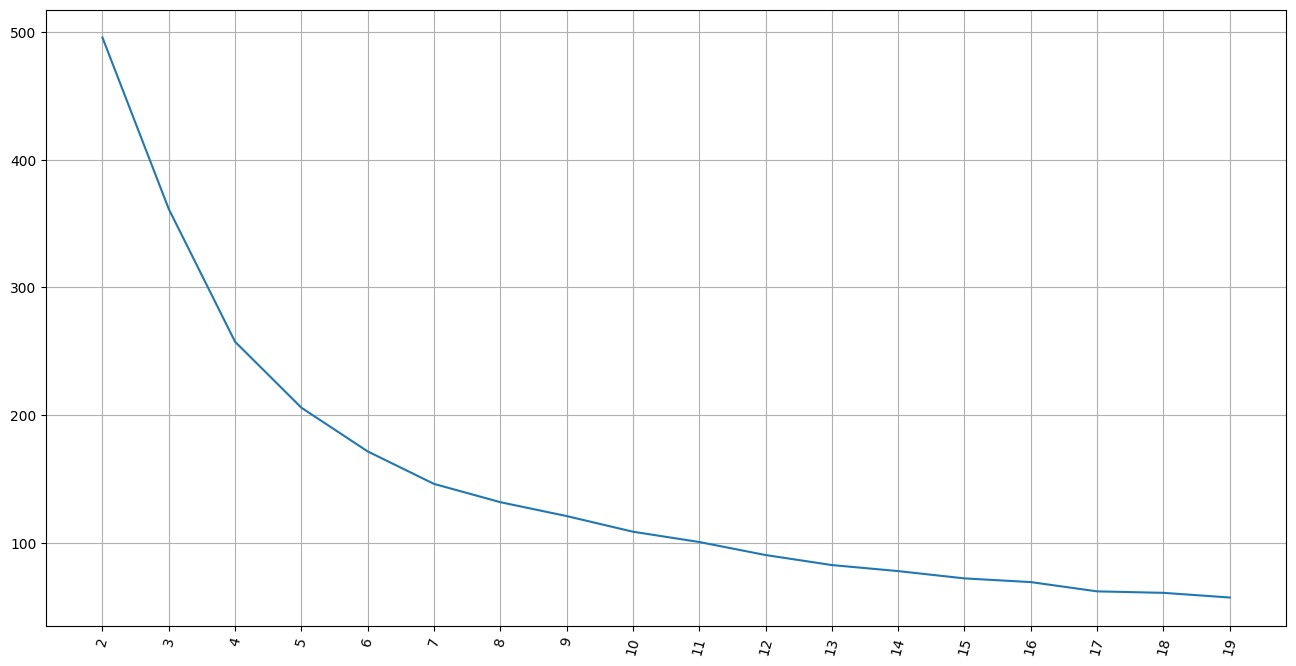

In [199]:
distorsions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16, 8))

plt.plot(range(2, max_loop), 
         distorsions)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

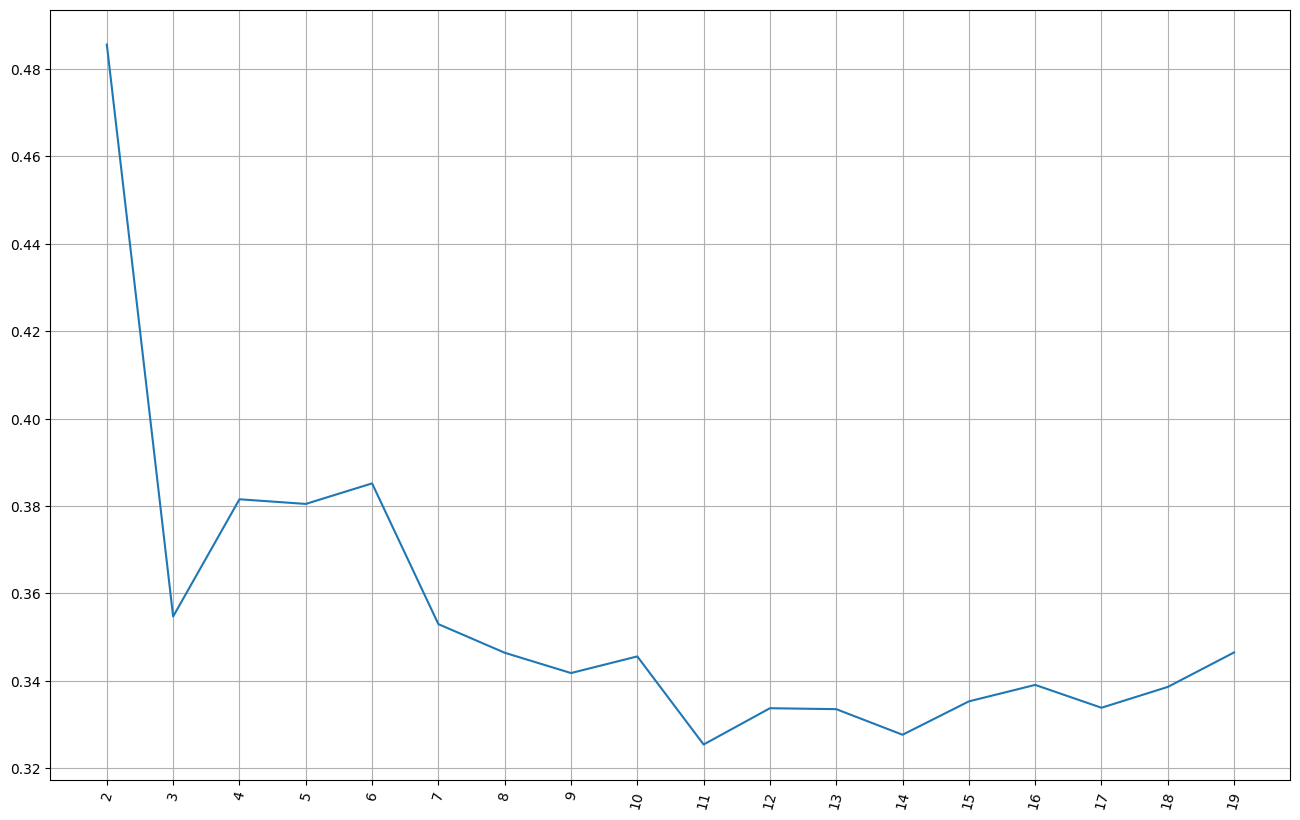

In [200]:
from sklearn import metrics
silhouette_score = []

for k in range(2, max_loop): #starts from k=2, there's no silouhette metric given for k =1 
        kmeans = KMeans(n_clusters = k,  
                        random_state = 627, 
                        n_init = 10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state = 627)
                               )
        
fig = plt.figure(figsize=(16, 10)
                )

plt.plot(range(2, max_loop), silhouette_score)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

In [201]:
nclust = 3

In [202]:
# Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [203]:
# Extracting labels 

target_labels = k_means.predict(X)

C:\Users\coool\AppData\Local\Temp\ipykernel_2488\3401718675.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "sg" (-> color='g'). The keyword argument will take precedence.
  plt.plot(centroids[:,0],


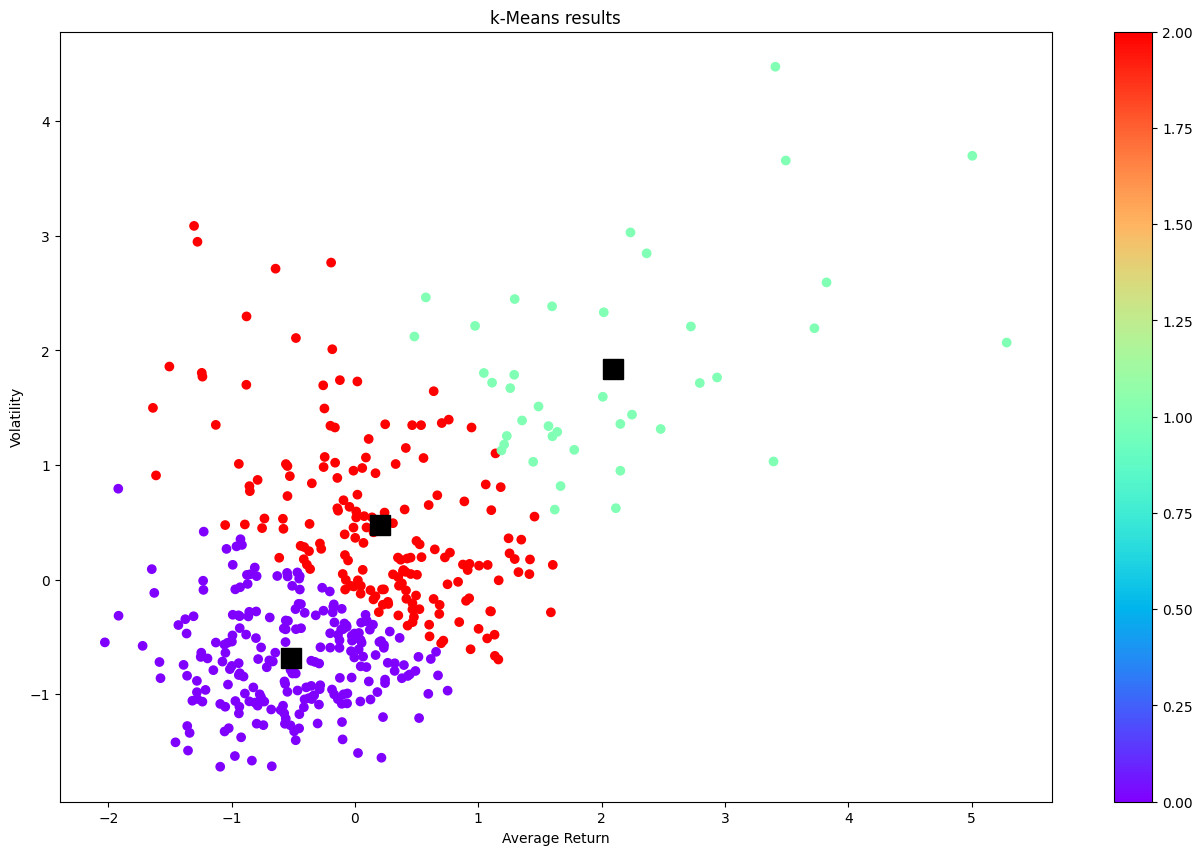

In [204]:
centroids = k_means.cluster_centers_

fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter =\
(    
    ax
    .scatter(X.iloc[ : ,0], 
             X.iloc[ : ,1], 
             c = k_means.labels_, 
             cmap = "rainbow", 
             label = X.index)
)

ax.set_title("k-Means results")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

plt.plot(centroids[:,0], 
         centroids[:,1], 
         "sg", 
         markersize = 15, 
         color = "black")

In [205]:
# show number of stocks in each cluster

clustered_series =\
(
    pd
    .Series(index = X.index, 
            data = k_means
                   .labels_
                   .flatten()
            )
)

In [206]:
# clustered stock with its cluster label
clustered_series_all =\
(    
    pd
    .Series(index=X.index, 
            data=k_means.labels_.flatten()
            )
)

clustered_series = clustered_series[clustered_series != -1]

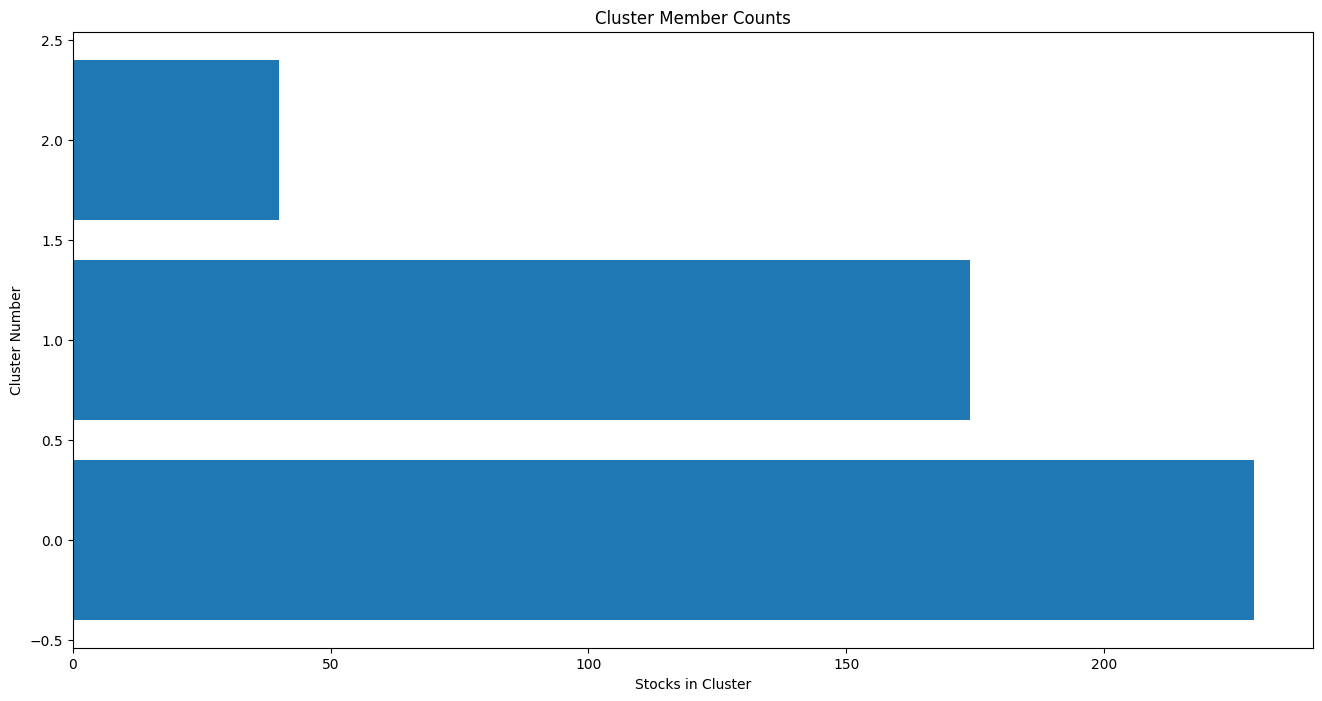

In [207]:
plt.figure(figsize=(16,8)
          )

plt.barh(
    range(len(clustered_series.value_counts()
             )
         ), # cluster labels, y axis
    clustered_series.value_counts()
)

plt.title("Cluster Member Counts")
plt.xlabel("Stocks in Cluster")
plt.ylabel("Cluster Number")

plt.show()

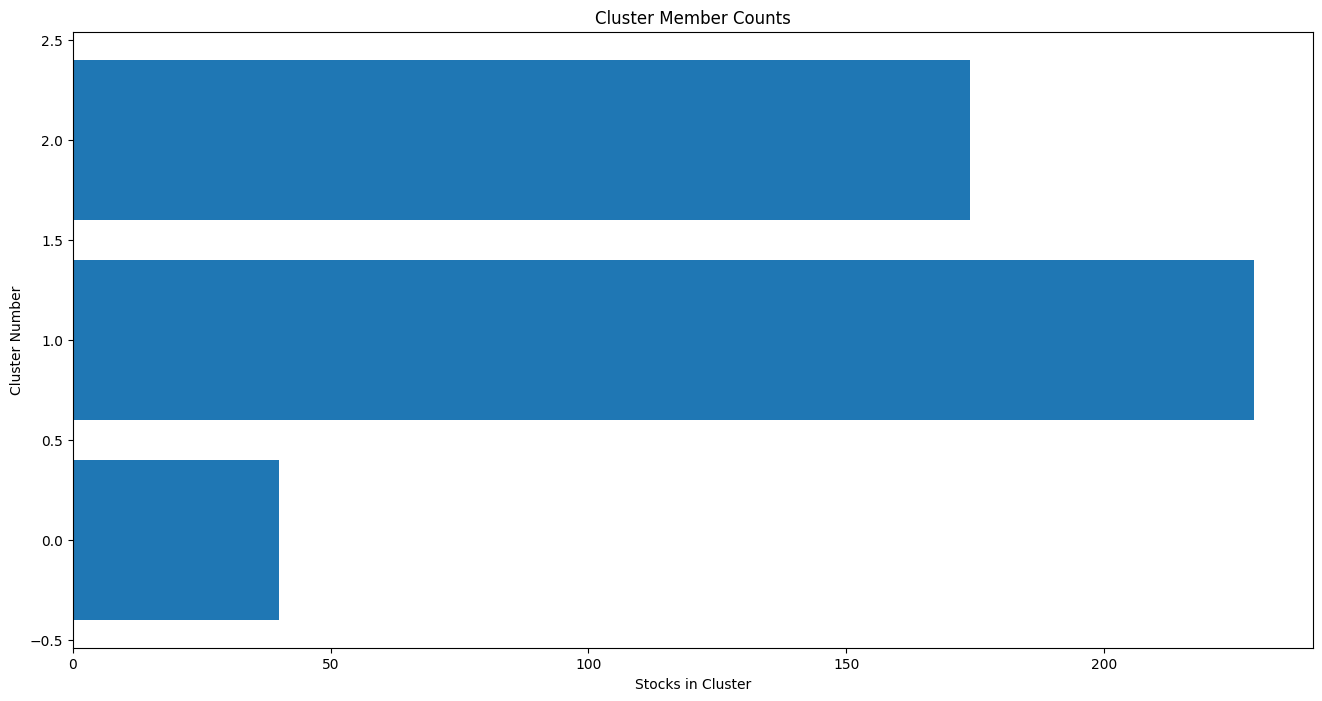

In [245]:
plt.figure(figsize=(16,8)
          )

counts =\
(    
    clustered_series
    .value_counts()
    .sort_index()
)

plt.barh(counts.index, 
         counts)

plt.title("Cluster Member Counts")
plt.xlabel("Stocks in Cluster")
plt.ylabel("Cluster Number")

plt.show()

Hierarchical Clustering (Agglomerative Clustering)

In [208]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [209]:
#Calulate linkage
Z = linkage(X, 
            method = "ward")
Z[0]

array([1.79000000e+02, 1.80000000e+02, 6.23034987e-03, 2.00000000e+00])

In [210]:
Z.ndim

2

In [211]:
pd.DataFrame(Z)

,0,1,2,3
0,179.0,180.0,0.006230,2.0
1,67.0,173.0,0.008946,2.0
2,6.0,255.0,0.011660,2.0
3,165.0,340.0,0.011787,2.0
4,194.0,226.0,0.013415,2.0
...,...,...,...,...
437,872.0,875.0,8.291161,160.0
438,874.0,879.0,9.895237,96.0
439,878.0,880.0,15.108326,328.0
440,877.0,881.0,16.423102,115.0


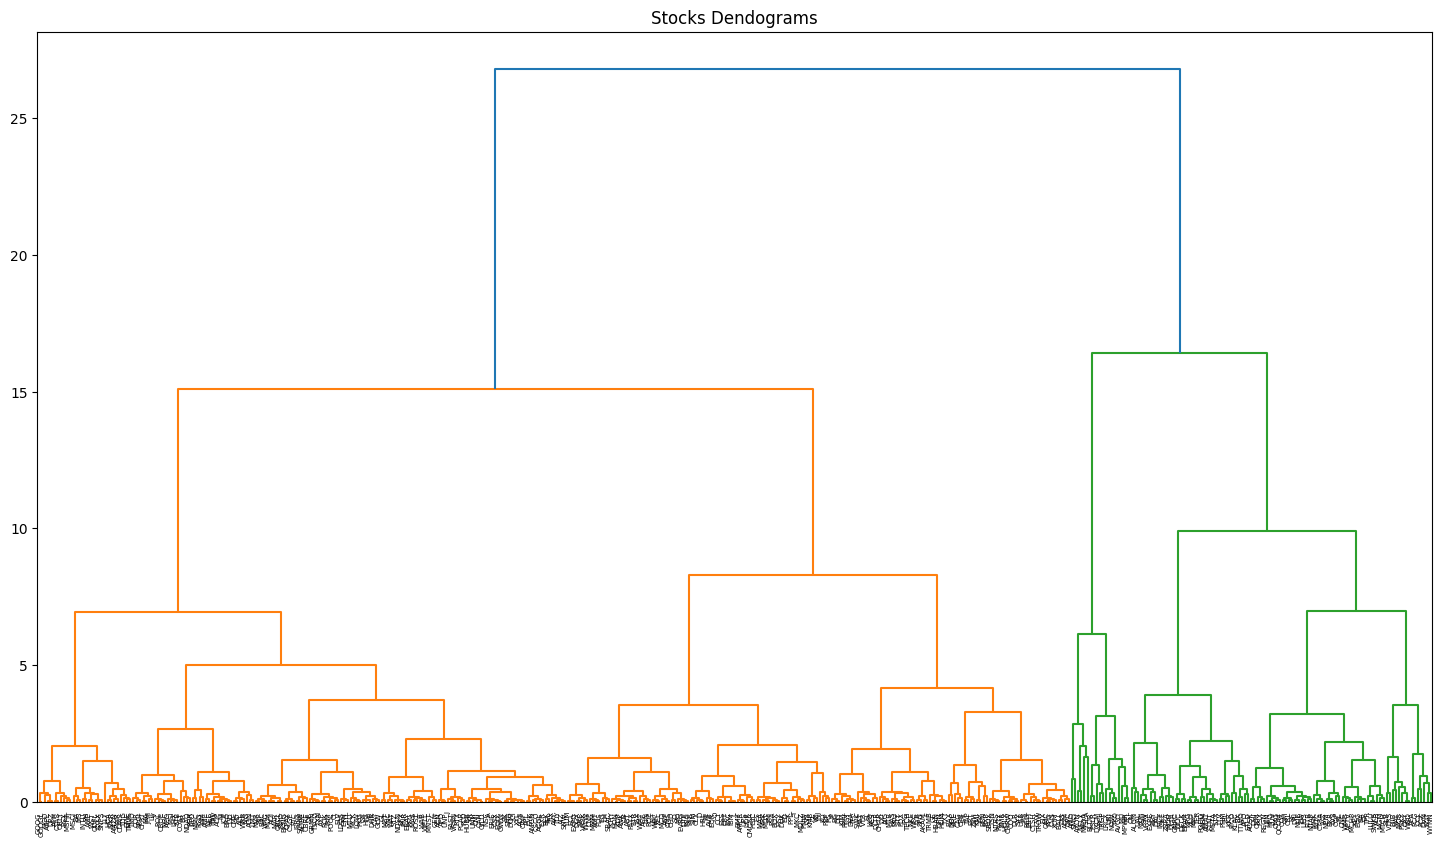

In [212]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

Clustering and Visualization

In [213]:
nclust = 4

hc = AgglomerativeClustering(n_clusters = nclust, 
#                              affinity = "euclidean", 
                             linkage = "ward")

clust_labels1 = hc.fit_predict(X)

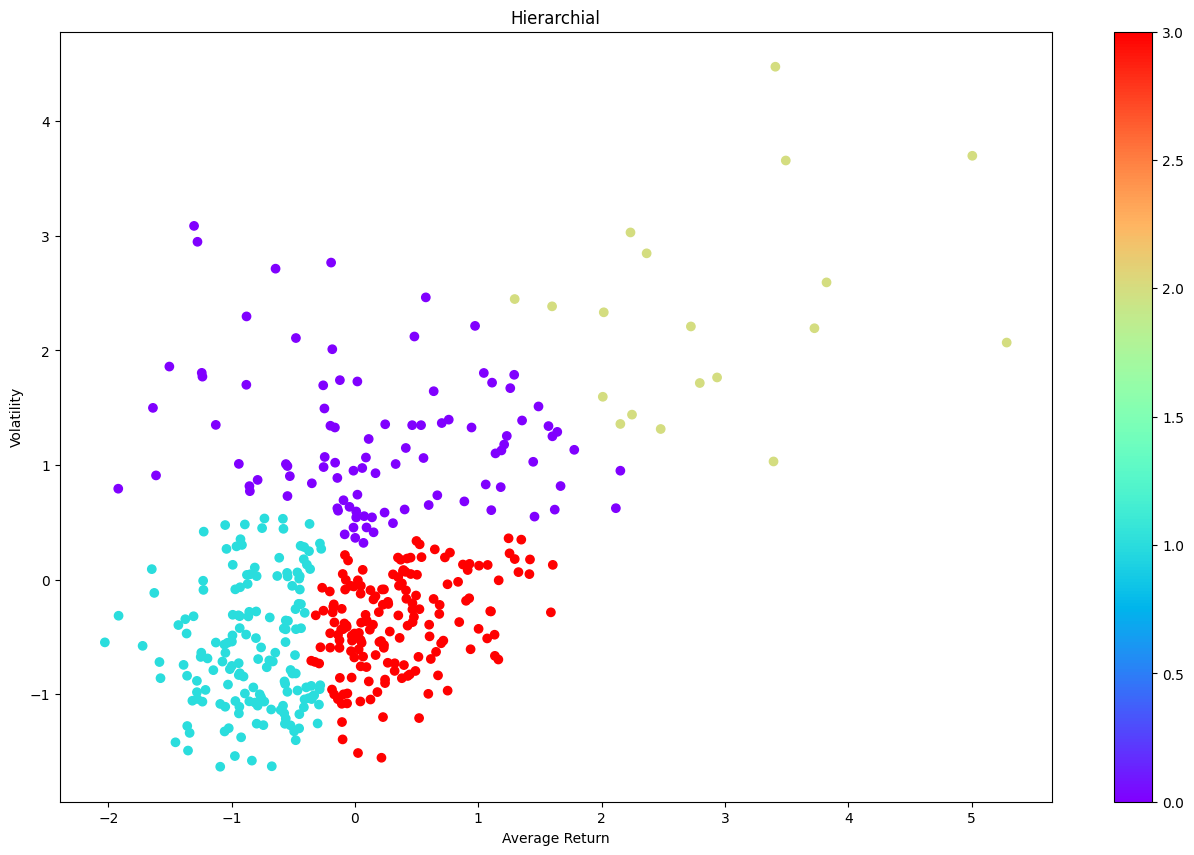

In [214]:
fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], 
                     X.iloc[:,1], 
                     c = clust_labels1, 
                     cmap = "rainbow")

ax.set_title("Hierarchial")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

## Affinity Propagation

In [215]:
ap = AffinityPropagation()

ap.fit(X)

clust_labels2 = ap.predict(X)

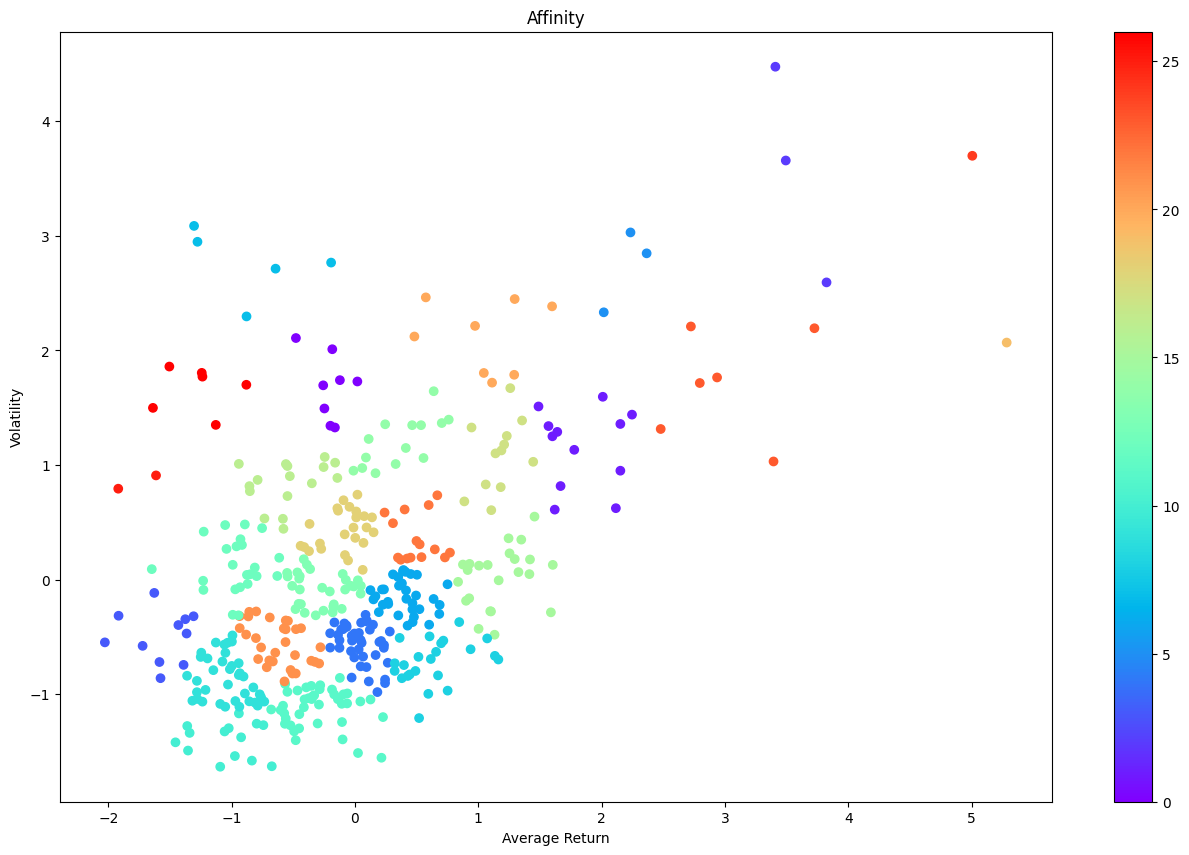

In [216]:
fig = plt.figure(figsize=(16,10)
                )
ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], 
                     X.iloc[:,1], 
                     c = clust_labels2, 
                     cmap = "rainbow")

ax.set_title("Affinity")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")
             
plt.colorbar(scatter)

## Cluster Visualisation

In [217]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

Estimated number of clusters: 27


<Figure size 640x480 with 0 Axes>

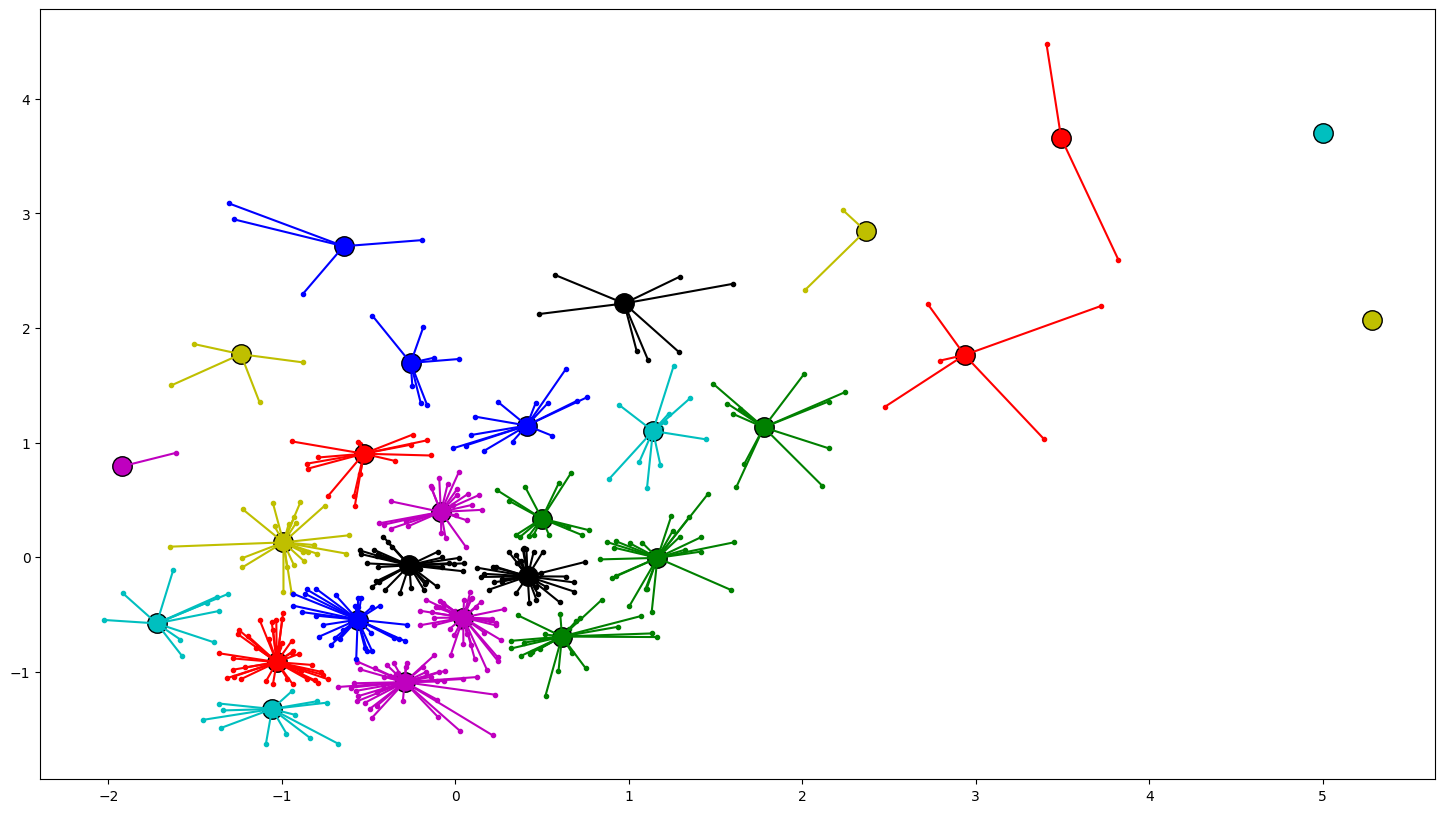

In [218]:
no_clusters = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % no_clusters)

# Plot exemplars

X_temp = np.asarray(X)

plt.close("all")
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(18,10)
                )
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk") # The sequence "bgrcmyk" (blue, green, red, cyan, magenta, yellow, black) 
                                               # is repeated four times

for k, col in zip(range(no_clusters), colors):
    
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + ".")
    
    plt.plot(cluster_center[0], cluster_center[1], 
             "o", 
             markerfacecolor = col, 
             markeredgecolor = "k", 
             markersize = 14)
    
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

## options to proceed from here 
1) centeroid of each cluster
2) choose one stock per cluster
3) Select only largest cluster

In [219]:
cluster_centers_indices

array([ 18,  21,  23,  36,  54,  57,  68,  73,  93,  98, 133, 222, 228,
       263, 273, 279, 289, 295, 297, 300, 307, 353, 355, 389, 396, 419,
       423])

In [220]:
len(cluster_centers_indices)

27

In [221]:
### extract out tickets of representative stocks based on cluster centers
representative_tickers =  X.index[cluster_centers_indices].tolist()
print(representative_tickers)


['ALB', 'AMAT', 'AMD', 'ARE', 'BK', 'BLDR', 'CAT', 'CCL', 'COR', 'CPT', 'ED', 'JKHY', 'KIM', 'MET', 'MOH', 'MSCI', 'NEM', 'NRG', 'NTAP', 'NVDA', 'ON', 'SBAC', 'SCHW', 'TPL', 'TSLA', 'VTRS', 'WBD']


In [ ]:
############


In [222]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten()
                               )

# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

In [223]:
from sklearn import metrics

In [224]:
print("km", metrics.silhouette_score(X, k_means.labels_, 
                                     metric='euclidean')
     )

print("hc", metrics.silhouette_score(X, hc.fit_predict(X), 
                                     metric='euclidean')
     )

print("ap", metrics.silhouette_score(X, ap.labels_, 
                                     metric='euclidean')
     )

km 0.3530526488123727
hc 0.3465306681380085
ap 0.3328163181557417


In [225]:
# All stock with its cluster label (including -1)
clustered_series = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                            )

# Clustered stock with its cluster label

clustered_series_all = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                                )

clustered_series = clustered_series[clustered_series != -1]

In [226]:
# Get the number of stocks in each cluster
counts = clustered_series_ap.value_counts()

# Let's visualize some clusters
cluster_vis_list = list(counts[(counts < 25) & (counts > 1)].index)[::-1]
cluster_vis_list

[25, 5, 2, 7, 26, 23, 0, 20, 3, 1, 17, 10, 14, 22, 16, 12, 8, 15, 18]

In [260]:
CLUSTER_SIZE_LIMIT = 9999

counts = clustered_series.value_counts()

ticker_count_reduced = counts[(counts>1) & (counts <= CLUSTER_SIZE_LIMIT)]

print ("Clusters formed: %d" % len(ticker_count_reduced)
      )
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)
                                 ).sum()
      )

Clusters formed: 24
Pairs to evaluate: 11688


In [261]:
# plot a handful of the smallest clusters
plt.figure(figsize=(16,10)
          )
cluster_vis_list[0:min(len(cluster_vis_list), 4)]

[24, 5, 2, 6]

<Figure size 1600x1000 with 0 Axes>

## Perform Data split

In [259]:
breakdown =\
    int(len(scaled_dfprices) * 0.75)

X_Train = scaled_dfprices[    : breakdown] # First 75% of the data
X_Test  = scaled_dfprices[breakdown:     ] # Remaining 25% of the data

X_Train_Raw = Daily_Linear_Return[    :breakdown]
X_Test_Raw  = Daily_Linear_Return[breakdown:    ]

In [ ]:
## version 1 - vanilla model of including everything 443 stocks

In [228]:
train_stocks = X_Train[tickers_no_spy] ##443 stocks
test_stocks = X_Test[tickers_no_spy]

train_spy = X_Train["SPY"]
test_spy = X_Test["SPY"]

In [229]:
## version 2 - use clustered centers

In [260]:
train_stocks_2 = X_Train[representative_tickers]
test_stocks_2 = X_Test[representative_tickers]

train_spy = X_Train["SPY"]
test_spy = X_Test["SPY"]

In [264]:
train_stock_2 = train_stocks_2.dropna()

In [232]:
train_spy.head(4)

Date
2012-07-03    0.920225
2012-08-13   -0.231452
2012-08-27   -0.116299
2012-08-28   -0.311380
Name: SPY, dtype: float64

In [233]:
stock_tickers =\
(
 scaled_dfprices
 .columns
 .values
)

stock_tickers

array(['A', 'AAPL', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP',
       'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM',
       'ALB', 'ALGN', 'ALL', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP',
       'AMT', 'AMZN', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APTV',
       'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO',
       'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BG', 'BIIB',
       'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRO', 'BSX',
       'BX', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI',
       'CCL', 'CDNS', 'CF', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL',
       'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF',
       'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL',
       'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CVS', 'CVX',
       'D', 'DAL', 'DD', 'DE', 'DECK', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',
       'DLR', 'DLTR', 'DOC', 'DOV', 'DPZ', 'DRI', 'DTE', 'DU

### PCA

## 1 Vanilla

In [ ]:
pca =\
(
    PCA()
    .fit(train_stocks)
)

In [238]:
def build_ML_portfolio_qf627(df):
    return pd.DataFrame(
        {f"ML Portfolio {i+1}": df.dot(pca.components_[i] / np.sum(np.abs(pca.components_[i]))
                                      )
         for i in range(5)
        },
        index = df.index
    )

In [175]:
ml_portfolio_train = build_ML_portfolio_qf627(X_Train_Raw[tickers_no_spy])

ml_portfolio_test = build_ML_portfolio_qf627(X_Test_Raw[tickers_no_spy])

In [176]:
train_all =\
(
    pd
    .concat(
        [ml_portfolio_train, X_Train_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
train_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2012-07-03,0.008799,-0.004846,-0.000207,0.007042,-0.001019,0.006593
2012-08-13,-0.001744,-0.000302,0.000445,-0.001569,0.000815,-0.000497
2012-08-27,-0.001441,0.001559,-0.000144,-0.001169,0.000350,0.000212
2012-08-28,-0.000044,0.000754,0.001301,-0.000374,0.002646,-0.000989
2012-08-31,0.005748,-0.001973,0.001170,0.002046,-0.000467,0.004769
...,...,...,...,...,...,...
2021-07-01,0.006817,0.001047,-0.003631,-0.001339,0.001432,0.005536
2021-07-06,-0.008089,0.010184,0.008626,-0.000717,0.001781,-0.001821
2021-07-07,0.004217,0.004942,0.002009,-0.002011,-0.003503,0.003534


In [177]:
test_all =\
(
    pd
    .concat(
        [ml_portfolio_test, X_Test_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
test_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2021-07-15,-0.001505,0.005278,-0.002220,-0.005324,-0.001442,-0.003415
2021-07-16,-0.007411,0.011525,0.004702,-0.004772,-0.002441,-0.007844
2021-07-23,0.007984,0.005200,0.004158,0.000474,0.001302,0.010288
2021-07-28,-0.000099,-0.006185,0.001682,0.005035,0.001008,-0.000410
2021-08-16,0.001219,0.006099,0.004844,-0.004422,-0.003215,0.002355
...,...,...,...,...,...,...
2025-08-18,-0.000679,-0.004413,0.001132,0.000083,0.000157,-0.000218
2025-09-08,-0.000168,-0.004126,0.003412,-0.000138,0.001055,0.002457
2025-10-20,0.009771,-0.002343,0.001291,0.002716,0.001879,0.010400


In [355]:
def calculate_metrics(ts_returns, periods_per_year = 252, starting_capital = 100_000):

    equity = ts_returns.add(1).cumprod()
    equity_dollars = equity * starting_capital
    years =\
    (
        equity.index[-1]
        -
        equity.index[0]
    ).days / 365.25
    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    if isinstance(annualized_vol, (int, float, np.floating)):
    # scalar case
        annualized_vol_safe = np.nan if annualized_vol == 0 else annualized_vol
    else:
        # pandas Series case
        annualized_vol_safe = annualized_vol.replace(0, np.nan)

    annualized_sharpe = annualized_return / annualized_vol_safe

    cagr = equity.iloc[-1] ** (1 / years) - 1

    max_dd =\
    (
        (equity - equity.cummax()
        )
        /
        equity.cummax()
    ).min()
    
    # Extract final account value as a scalar, not a Series
    final_account_value = equity_dollars.iloc[-1].values if hasattr(equity_dollars.iloc[-1], 'values') else equity_dollars.iloc[-1]

    return pd.DataFrame({
        "CAGR": [cagr],
        "Sharpe": [annualized_sharpe],  # Keep as raw number, not percentage
        "Max_Drawdown": [max_dd],
        "Final_Account_Value": [final_account_value]  # Keep as dollar amount
    }
    )

In [179]:
metrics_train = calculate_metrics(train_all)

c:\Users\coool\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [180]:
print("Training Set Performance")
(
    metrics_train
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Training Set Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,5.02%,2.75,-11.97%,"$155,609.63"
ML Portfolio 2,0.84%,0.72,-6.29%,"$107,862.14"
ML Portfolio 3,1.92%,2.19,-2.20%,"$118,702.80"
ML Portfolio 4,1.01%,1.32,-3.88%,"$109,524.49"
ML Portfolio 5,1.00%,1.46,-2.04%,"$109,350.52"
SPY,4.83%,2.69,-13.01%,"$153,067.55"


In [181]:
# Diagnostic: Check train_all values
print("First few rows of train_all:")
print(train_all.head())
print("\nMean values (should be small daily returns like 0.001 = 0.1%):")
print(train_all.mean())
print("\nSum of weights in ML Portfolio 1:")
print("Sum of absolute weights in PCA component 1:", np.sum(np.abs(pca.components_[0])))

First few rows of train_all:
            ML Portfolio 1  ML Portfolio 2  ML Portfolio 3  ML Portfolio 4  \
Date                                                                         
2012-07-03        0.008799       -0.004846       -0.000207        0.007042   
2012-08-13       -0.001744       -0.000302        0.000445       -0.001569   
2012-08-27       -0.001441        0.001559       -0.000144       -0.001169   
2012-08-28       -0.000044        0.000754        0.001301       -0.000374   
2012-08-31        0.005748       -0.001973        0.001170        0.002046   

            ML Portfolio 5       SPY  
Date                                  
2012-07-03       -0.001019  0.006593  
2012-08-13        0.000815 -0.000497  
2012-08-27        0.000350  0.000212  
2012-08-28        0.002646 -0.000989  
2012-08-31       -0.000467  0.004769  

Mean values (should be small daily returns like 0.001 = 0.1%):
ML Portfolio 1    0.000968
ML Portfolio 2    0.000169
ML Portfolio 3    0.000372
ML Por

In [182]:
metrics_test = calculate_metrics(test_all)

c:\Users\coool\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [183]:
print("Testing Set (Out-of-Data) Performance")
(
    metrics_test
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Testing Set (Out-of-Data) Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,2.58%,2.09,-5.21%,"$111,674.48"
ML Portfolio 2,0.22%,0.26,-5.42%,"$100,951.28"
ML Portfolio 3,-0.57%,-0.73,-4.66%,"$97,571.21"
ML Portfolio 4,-0.00%,-0.01,-3.55%,"$99,978.38"
ML Portfolio 5,-0.07%,-0.13,-3.93%,"$99,684.99"
SPY,3.27%,2.46,-5.64%,"$114,952.91"


# 2) AP - 26 Clustered stocks + PCA

In [267]:
pca =\
(
    PCA()
    .fit(train_stocks_2.dropna())
)

In [268]:
ml_portfolio_train = build_ML_portfolio_qf627(X_Train_Raw[representative_tickers])

ml_portfolio_test = build_ML_portfolio_qf627(X_Test_Raw[representative_tickers])

In [269]:
train_all =\
(
    pd
    .concat(
        [ml_portfolio_train, X_Train_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
train_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2012-07-02,0.002517,0.005090,-0.006494,-0.000437,-0.001904,0.003013
2012-07-03,0.012744,-0.004028,0.007106,-0.004586,0.006791,0.006593
2012-07-05,-0.006610,0.000608,0.001233,0.000020,-0.004722,-0.004512
2012-07-06,-0.012336,0.006446,-0.004664,-0.000124,-0.009012,-0.009504
2012-07-09,-0.002542,0.010146,0.002933,0.015423,-0.009743,-0.001255
...,...,...,...,...,...,...
2022-07-05,-0.002456,-0.012993,0.005121,-0.006032,-0.017081,0.001889
2022-07-06,-0.004435,0.004495,0.009891,0.005123,-0.001014,0.003377
2022-07-07,0.025476,-0.020188,0.008163,-0.014768,-0.001024,0.014977


In [274]:
pca_train = train_all['ML Portfolio 1']

In [270]:
test_all =\
(
    pd
    .concat(
        [ml_portfolio_test, X_Test_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
test_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2022-07-12,0.002305,-0.003721,-0.011349,-0.007526,-0.008486,-0.008849
2022-07-13,-0.004487,-0.002987,0.006715,-0.006824,0.001136,-0.005252
2022-07-14,-0.005964,-0.006953,0.011289,0.003663,-0.011830,-0.002429
2022-07-15,0.024663,-0.003373,-0.002058,0.000748,-0.008274,0.019105
2022-07-18,-0.001953,-0.005049,-0.003208,-0.007309,-0.002887,-0.008257
...,...,...,...,...,...,...
2025-11-10,0.007912,-0.009638,0.010767,-0.009445,0.013711,0.015604
2025-11-11,0.003337,0.008610,-0.007972,0.009058,0.003413,0.002289
2025-11-12,0.008583,-0.006958,0.006593,-0.005772,0.013722,0.000556


In [275]:
pca_test = test_all['ML Portfolio 1']

In [242]:
metrics_train = calculate_metrics(train_all)

In [271]:
metrics_train

,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
0,ML Portfolio 1 0.069699 ML Portfolio 2 0...,ML Portfolio 1 3.263456 ML Portfolio 2 1...,ML Portfolio 1 -0.121249 ML Portfolio 2 -0...,"[183677.27833148531, 114493.61935429115, 14822..."


In [243]:
print("Training Set Performance")
(
    metrics_train
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Training Set Performance


TypeError: unsupported format string passed to Series.__format__

In [287]:
metrics_test = calculate_metrics(test_all)

In [288]:
print("Testing Set (Out-of-Data) Performance")
(
    metrics_test
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Testing Set (Out-of-Data) Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,3.50%,2.10,-8.13%,"$116,099.34"
ML Portfolio 2,0.36%,0.36,-4.72%,"$101,553.72"
ML Portfolio 3,1.79%,1.13,-6.52%,"$107,976.21"
ML Portfolio 4,-0.70%,-0.69,-5.63%,"$97,000.30"
ML Portfolio 5,2.10%,2.37,-3.49%,"$109,404.69"
SPY,3.27%,2.46,-5.64%,"$114,952.91"


### Back testing now with the new feature

In [ ]:
pca_train

In [350]:
X =\
(
    compute_x_var("SPY")
)
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.973579,95.973579,95.973579
2006-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.963389,95.969964,95.973022
2006-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.924443,95.955720,95.970794
2006-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.088939,96.012071,95.979336
2006-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.291092,96.088762,95.991489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10,NaN,NaN,0.024735,-0.002784,0.014992,0.026408,0.060148,674.063331,660.491048,605.227220,676.876929,671.631986,620.285910
2025-11-11,NaN,NaN,-0.094889,0.011427,0.017294,0.024935,0.062652,675.013808,661.124270,605.602396,677.990214,672.365406,620.909931
2025-11-12,NaN,NaN,-0.028155,0.008523,0.023062,0.022089,0.068648,676.020952,661.762573,605.968964,678.970176,673.076025,621.531524
2025-11-13,NaN,NaN,0.025318,0.002578,0.000417,0.004205,0.054576,676.348095,662.244778,606.288297,677.710140,673.009184,622.034096


In [351]:
data =\
(
    pd
    .concat([spy_weekly, X, pca_train],
            axis = 1)
    .dropna()
)
data

,SPY_pred,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML Portfolio 1
2012-07-02,-0.017514,-0.001007,0.007940,-0.193175,0.038761,0.043244,0.056033,-0.018575,104.904207,106.371521,100.733483,105.961394,105.417691,103.301849,0.002517
2012-07-03,-0.023936,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279693,106.332332,100.753518,106.454353,105.627689,103.355290,0.012744
2012-07-05,-0.024271,0.007533,0.001804,-0.118925,0.026820,0.040282,0.039299,0.011696,105.595485,106.302843,100.771115,106.768523,105.792502,103.403320,-0.006610
2012-07-06,0.001917,-0.002509,-0.013220,0.001170,0.020129,0.020189,0.029221,-0.005915,105.753667,106.257909,100.780360,106.838640,105.880351,103.440642,-0.012336
2012-07-09,0.000813,0.003017,-0.011031,0.067881,-0.005748,0.008759,0.026001,-0.020152,105.902450,106.230448,100.792022,106.871563,105.953859,103.476254,-0.002542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.007812,-0.000962,-0.018503,-0.019656,-0.022923,-0.047319,-0.023165,-0.163794,369.813433,389.679045,415.691573,364.258635,372.496032,401.781377,0.005941
2022-07-05,-0.002963,-0.003457,-0.022212,-0.029340,-0.017209,-0.016008,-0.015135,-0.151858,368.282615,388.632065,415.518321,364.405597,372.016735,401.416059,-0.002456
2022-07-06,-0.011600,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120930,387.546045,415.352916,364.750004,371.647903,401.066644,-0.004435
2022-07-07,-0.028898,0.002208,-0.013910,-0.096077,0.022488,0.043956,-0.015871,-0.135969,366.163845,386.634267,415.203559,366.029283,371.656815,400.775295,0.025476


In [352]:
#calculate orthogonal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data[['SPY_DT', 'SPY_3DT']], data['ML Portfolio 1'])
residuals = data['ML Portfolio 1'] - lr.predict(data[['SPY_DT', 'SPY_3DT']])
data['ML_Portfolio_Orthogonal'] = residuals

In [353]:
Y =\
(
    data
    .loc[ : , spy_weekly.name]
)

Y

2012-07-02   -0.017514
2012-07-03   -0.023936
2012-07-05   -0.024271
2012-07-06    0.001917
2012-07-09    0.000813
                ...   
2022-07-01    0.007812
2022-07-05   -0.002963
2022-07-06   -0.011600
2022-07-07   -0.028898
2022-07-08   -0.009150
Name: SPY_pred, Length: 2381, dtype: float64

In [355]:
X =\
(
    data
    .iloc[ : , 1:]
)
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML Portfolio 1,ML_Portfolio_Orthogonal
2012-07-02,-0.001007,0.007940,-0.193175,0.038761,0.043244,0.056033,-0.018575,104.904207,106.371521,100.733483,105.961394,105.417691,103.301849,0.002517,-0.007074
2012-07-03,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279693,106.332332,100.753518,106.454353,105.627689,103.355290,0.012744,0.002806
2012-07-05,0.007533,0.001804,-0.118925,0.026820,0.040282,0.039299,0.011696,105.595485,106.302843,100.771115,106.768523,105.792502,103.403320,-0.006610,-0.013367
2012-07-06,-0.002509,-0.013220,0.001170,0.020129,0.020189,0.029221,-0.005915,105.753667,106.257909,100.780360,106.838640,105.880351,103.440642,-0.012336,-0.017421
2012-07-09,0.003017,-0.011031,0.067881,-0.005748,0.008759,0.026001,-0.020152,105.902450,106.230448,100.792022,106.871563,105.953859,103.476254,-0.002542,-0.001461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,-0.000962,-0.018503,-0.019656,-0.022923,-0.047319,-0.023165,-0.163794,369.813433,389.679045,415.691573,364.258635,372.496032,401.781377,0.005941,0.011335
2022-07-05,-0.003457,-0.022212,-0.029340,-0.017209,-0.016008,-0.015135,-0.151858,368.282615,388.632065,415.518321,364.405597,372.016735,401.416059,-0.002456,0.001446
2022-07-06,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120930,387.546045,415.352916,364.750004,371.647903,401.066644,-0.004435,-0.006399
2022-07-07,0.002208,-0.013910,-0.096077,0.022488,0.043956,-0.015871,-0.135969,366.163845,386.634267,415.203559,366.029283,371.656815,400.775295,0.025476,0.019726


In [356]:
##try a different subset
X =\
(
    X
    .loc[ : , ~X.columns.str.contains(r"ML Portfolio 1")]
)
X


,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML_Portfolio_Orthogonal
2012-07-02,-0.001007,0.007940,-0.193175,0.038761,0.043244,0.056033,-0.018575,104.904207,106.371521,100.733483,105.961394,105.417691,103.301849,-0.007074
2012-07-03,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279693,106.332332,100.753518,106.454353,105.627689,103.355290,0.002806
2012-07-05,0.007533,0.001804,-0.118925,0.026820,0.040282,0.039299,0.011696,105.595485,106.302843,100.771115,106.768523,105.792502,103.403320,-0.013367
2012-07-06,-0.002509,-0.013220,0.001170,0.020129,0.020189,0.029221,-0.005915,105.753667,106.257909,100.780360,106.838640,105.880351,103.440642,-0.017421
2012-07-09,0.003017,-0.011031,0.067881,-0.005748,0.008759,0.026001,-0.020152,105.902450,106.230448,100.792022,106.871563,105.953859,103.476254,-0.001461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,-0.000962,-0.018503,-0.019656,-0.022923,-0.047319,-0.023165,-0.163794,369.813433,389.679045,415.691573,364.258635,372.496032,401.781377,0.011335
2022-07-05,-0.003457,-0.022212,-0.029340,-0.017209,-0.016008,-0.015135,-0.151858,368.282615,388.632065,415.518321,364.405597,372.016735,401.416059,0.001446
2022-07-06,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120930,387.546045,415.352916,364.750004,371.647903,401.066644,-0.006399
2022-07-07,0.002208,-0.013910,-0.096077,0.022488,0.043956,-0.015871,-0.135969,366.163845,386.634267,415.203559,366.029283,371.656815,400.775295,0.019726


In [357]:
testing_set = 0.25

train_size = int(len(X) * (1 - testing_set)
                )
train_size_bh = int(len(bh_returns) * (1 - testing_set))

In [358]:
Y_train, Y_test =\
(
    Y[0         : train_size],
    Y[train_size:len(Y)     ]
)

In [359]:
X_train, X_test =\
(
    X[0         : train_size],
    X[train_size:len(X)     ]
)

In [360]:
#set up variables for buyandhold
spy_weekly_price = spy_price.resample('W-FRI').last() 
bh_returns = np.log(spy_weekly_price).diff()   # no shift!
bh_train = bh_returns.iloc[:train_size_bh].dropna()
bh_test  = bh_returns.iloc[train_size_bh:].dropna()

In [361]:
linear_regression = None

for name, model in models:
    if name == "LR":
        linear_regression = model
        break
linear_regression.fit(X_train, Y_train)

y_pred_train_lr = linear_regression.predict(X_train)
y_pred_test_lr = linear_regression.predict(X_test)


In [289]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_lr, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_lr, Y_test)
linear_regression_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)


Momentum Strategy Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.243289  0.524018     -0.279591        511909.042982

Testing Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.500346  0.500277     -0.362016        275994.534035

Buy-and-Hold Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.098106  0.511577     -0.546131         379102.40424

Testing Set:
       CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  0.138327  0.8482     -0.239272        185111.077314

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.524 vs BH: 0.512
Test  - Momentum: 0.500 vs BH: 0.848

CAGR (Annualized Return):
Train - Momentum: 0.243 vs BH: 0.098
Test  - Momentum: 0.500 vs BH: 0.138

MAX DRAWDOWN:
Train - Momentum: -0.280 vs BH: -0.546
Test  - Momentum: -0.362 vs BH: -0.239

FINAL ACCOUNT VALUE ($):
Train - Momentum: $511,909.04 vs BH: $379,102.40
Test  - Momentum: $275,994

In [298]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_lr, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_lr, Y_test)
linear_regression_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)


Momentum Strategy Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.169521  0.458266     -0.268091        323587.455576

Testing Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0 -0.016155 -0.023489     -0.398724         96006.209537

Buy-and-Hold Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.098106  0.511577     -0.546131         379102.40424

Testing Set:
       CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  0.138327  0.8482     -0.239272        185111.077314

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.458 vs BH: 0.512
Test  - Momentum: -0.023 vs BH: 0.848

CAGR (Annualized Return):
Train - Momentum: 0.170 vs BH: 0.098
Test  - Momentum: -0.016 vs BH: 0.138

MAX DRAWDOWN:
Train - Momentum: -0.268 vs BH: -0.546
Test  - Momentum: -0.399 vs BH: -0.239

FINAL ACCOUNT VALUE ($):
Train - Momentum: $323,587.46 vs BH: $379,102.40
Test  - Momentum: $96,00

In [362]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_lr, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_lr, Y_test)
linear_regression_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)


Momentum Strategy Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.243289  0.524018     -0.279591        511909.042982

Testing Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.500346  0.500277     -0.362016        275994.534035

Buy-and-Hold Performance:
Training Set:
       CAGR    Sharpe  Max_Drawdown  Final_Account_Value
0  0.098106  0.511577     -0.546131         379102.40424

Testing Set:
       CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  0.138327  0.8482     -0.239272        185111.077314

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.524 vs BH: 0.512
Test  - Momentum: 0.500 vs BH: 0.848

CAGR (Annualized Return):
Train - Momentum: 0.243 vs BH: 0.098
Test  - Momentum: 0.500 vs BH: 0.138

MAX DRAWDOWN:
Train - Momentum: -0.280 vs BH: -0.546
Test  - Momentum: -0.362 vs BH: -0.239

FINAL ACCOUNT VALUE ($):
Train - Momentum: $511,909.04 vs BH: $379,102.40
Test  - Momentum: $275,994